## Data Quality Report.


As part of data quality control, it is important to plot and look at the data and visually inspect for errors.
This is usually done using the Human-In-The-Loop review process, which includes the following steps:
- Examine automated test outputs, system annotations, and data plots.
- Write observations regarding issues with data quality.

In this notebook, a set of files of a sensor collecting data over multiple deployments is used as an example to plot data and create output files to report on issues.


### Notebook Outline:
-  [Define Output Directory.](#21)
-  [Python Packages.](#1)
-  [Sensor Metadata.](#2)
-  [Deployment Coordinates.](#3)
    - [Compare Deployments Coordinate Locations.](#31)
    - [Plot Coordinate Location Differences in km.](#32)
-  [Deployment Depth.](#4)
    -  [Plot Deployment Depth Location.](#41)
-  [Deployment Start and End Dates.](#5)
    -  [Plot Deployment Timeline.](#51)
-  [Deployments' Datasets.](#6)
    - [Plot Deployments' Datasets - case of one parameter.](#61)
    - [Plot Deployments' Datasets - case of multiple parameters.](#62)
    - [Plot Science Variables Without Outliers.](#63)
-  [Report Flags.](#7)
-  [Data Annotations.](#8)
-  [Data Notes.](#9)
-  [Data Report Files.](#10)

<span style='color:Orange' size=20 > **Attention:** </span> 
- To run the notebook, you need to follow the septs in order.
- For the code cell, run the cell before you move on to the next one. 
    - **Remember**: The output of a cell may be an input in the next cell.

<a id="21" ></a>
### Define Output Directory.

In [1]:
# define a directory to save output files and data plots.
save_to_dir = '/Users/leilabelabassi/Documents/GitHub/GEOS612-data-quality/Module5/Data_Reporting_Outputs/'

<a id="1"></a>
### Python Packages.

In [1]:
import os
import requests
import json
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
from geopy.distance import geodesic

import matplotlib.dates as mdates
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<a id="2"></a>
### Sensor Metadata.
- The sensor metadata is obtained from a data review database.
- The function refdes_datareview_json() returns a dictionary with sensor information.
- The sensor reference designator **'GP03FLMB-RIM01-02-CTDMOG060'** is used to parse sensor information from the data review database.
- The link to the source URL for the sensor database page is found [here](http://datareview.marine.rutgers.edu/instruments/view/GP03FLMB-RIM01-02-CTDMOG060). 

In [2]:
sensor_info = requests.get('http://datareview.marine.rutgers.edu/instruments/view/GP03FLMB-RIM01-02-CTDMOG060.json').json()

In [3]:
pd.DataFrame(sensor_info)

,instrument
annotations,"[{'id': 154, 'reference_designator': 'GP03FLMB..."
created,2017-12-12T14:13:51+00:00
current_status,Complete
data_streams,"[{'id': 5004, 'reference_designator': 'GP03FLM..."
dependency,
deployments,"[{'id': 3299, 'deploy_cuid': 'MV-1309', 'deplo..."
end_depth,30
id,984
image_url,https://marine.rutgers.edu/cool/ooi/data-eval/...
last_reviewed,None


In [2]:
# the source URL for the sensor database page.
sensor_url = 'http://datareview.marine.rutgers.edu/instruments/view/GP03FLMB-RIM01-02-CTDMOG060'

# add .json to the URL page to put the content of the page in a json format file.
ref_des_url = os.path.join(sensor_url,'.json')

# send a request and return the json file content in a dictionary structure.
sensor_info = requests.get(ref_des_url).json()

# print the content in pandas data frame
pd.DataFrame(sensor_info)

,instrument
annotations,"[{'id': 154, 'reference_designator': 'GP03FLMB..."
created,2017-12-12T14:13:51+00:00
current_status,Complete
data_streams,"[{'id': 5004, 'reference_designator': 'GP03FLM..."
dependency,
deployments,"[{'id': 3299, 'deploy_cuid': 'MV-1309', 'deplo..."
end_depth,30
id,984
image_url,https://marine.rutgers.edu/cool/ooi/data-eval/...
last_reviewed,None


In [4]:
# print the dictionary .keys() to use when parsing the content.
print('\n sensor information are put under the variable: \n \n', sensor_info.keys())


 sensor information are put under the variable: 
 
 dict_keys(['instrument'])


In [ ]:
# print one level down in the dictionary hierarchy to parse more of the content.
print('\n variable stored under instrument are : \n\n', sensor_info['instrument'].keys())


In [5]:
# from the dic_key output get the sensor name to add to the name of the output files.
sensor_name = sensor_info['instrument']['reference_designator']
sensor_name

'GP03FLMB-RIM01-02-CTDMOG060'

<a id="3"></a>
### Deployment Coordinates.

In [6]:
# put sensor_info deployments' information in a dataframe.
deploy = pd.DataFrame(sensor_info['instrument']['deployments'])
deploy

,id,deploy_cuid,deployed_by,recover_cuid,recovered_by,reference_designator,deployment_number,version_number,start_date,stop_date,mooring_uid,node_uid,sensor_uid,latitude,longitude,orbit,deployment_depth,water_depth,notes
0,3299,MV-1309,None,MV-1404,None,GP03FLMB-RIM01-02-CTDMOG060,1,1,2013-07-24T06:32:00+00:00,2014-06-18T00:00:00+00:00,CGMGP-03FLMB-00001,None,CGINS-CTDMOG-10255,50.3317,-144.401,None,30.0,4145,None
1,3318,MV-1404,None,TN-323,None,GP03FLMB-RIM01-02-CTDMOG060,2,1,2014-06-20T02:00:00+00:00,2015-06-07T00:00:00+00:00,CGMGP-03FLMB-00002,None,CGINS-CTDMOG-11646,50.3313,-144.398,None,31.0,4145,None
2,3337,TN-323,None,RB-16-05,None,GP03FLMB-RIM01-02-CTDMOG060,3,1,2015-06-08T21:25:00+00:00,2016-07-03T18:35:00+00:00,CGMGP-03FLMB-00003,None,CGINS-CTDMOG-12638,50.3303,-144.398,None,47.0,4145,None
3,3356,RB-16-05,None,SR17-10,None,GP03FLMB-RIM01-02-CTDMOG060,4,1,2016-07-04T23:07:00+00:00,2017-07-17T15:02:00+00:00,CGMGP-03FLMB-00004,None,CGINS-CTDMOG-11638,50.3293,-144.398,None,NaN,4146,None
4,3375,SR17-10,None,SR1811,None,GP03FLMB-RIM01-02-CTDMOG060,5,1,2017-07-14T22:49:00+00:00,2018-07-25T17:11:00+00:00,CGMGP-03FLMB-00005,None,CGINS-CTDMOG-13422,50.3777,-144.515,None,NaN,4169,None
5,3394,SR1811,None,SKQ201920S,None,GP03FLMB-RIM01-02-CTDMOG060,6,1,2018-07-24T23:01:00+00:00,2019-09-27T23:55:00+00:00,CGMGP-03FLMB-00006,None,CGINS-CTDMOG-10225,50.3295,-144.398,None,NaN,4145,None
6,3413,SKQ201920S,None,None,None,GP03FLMB-RIM01-02-CTDMOG060,7,1,2019-09-27T21:26:00+00:00,None,CGMGP-03FLMB-00007,None,CGINS-CTDMOG-10218,50.3755,-144.514,None,NaN,4176,None


In [7]:
# Parse deploy dataframe for 'latitude' and 'longitude' information.
coordinate_table = deploy[['deployment_number','latitude','longitude']]
coordinate_table

,deployment_number,latitude,longitude
0,1,50.3317,-144.401
1,2,50.3313,-144.398
2,3,50.3303,-144.398
3,4,50.3293,-144.398
4,5,50.3777,-144.515
5,6,50.3295,-144.398
6,7,50.3755,-144.514


<a id="31"></a>
#### Compare Deployments Coordinate Locations.

In [8]:
# Calculate the distance in kilometers between the instrument's coordinate locations. 

# create an empty dictionary
distance = {}

# Loop through the deploy table: 
#  i: row index , k: row columns (deployment_number, latitude, longitude)
for i, k in coordinate_table.iterrows():
    # start from the second row in the table
    if i > 0:
        
        loc1 = [k['latitude'], k['longitude']]
        d1 = int(k['deployment_number'])
        
        # calculate the difference in the distance between one deployment and all the rest
        for x in range(i):
            
            info0 = coordinate_table.iloc[x]
            
            loc0 = [info0['latitude'], info0['longitude']]
            d0 = int(info0['deployment_number'])
             
            # calculate the difference
            diff_loc = round(geodesic(loc0, loc1).kilometers, 4)
            
            # write to a dictionary the deployments compared and their calculated difference
            compare = 'diff_km_D{}_to_D{}'.format(d1, d0)
            distance.update({compare: diff_loc})

# print dictionary
distance

{'diff_km_D2_to_D1': 0.2182,
 'diff_km_D3_to_D1': 0.2643,
 'diff_km_D3_to_D2': 0.1112,
 'diff_km_D4_to_D1': 0.3419,
 'diff_km_D4_to_D2': 0.2225,
 'diff_km_D4_to_D3': 0.1112,
 'diff_km_D5_to_D1': 9.5918,
 'diff_km_D5_to_D2': 9.7965,
 'diff_km_D5_to_D3': 9.8556,
 'diff_km_D5_to_D4': 9.9156,
 'diff_km_D6_to_D1': 0.3248,
 'diff_km_D6_to_D2': 0.2002,
 'diff_km_D6_to_D3': 0.089,
 'diff_km_D6_to_D4': 0.0222,
 'diff_km_D6_to_D5': 9.9036,
 'diff_km_D7_to_D1': 9.4028,
 'diff_km_D7_to_D2': 9.6087,
 'diff_km_D7_to_D3': 9.6662,
 'diff_km_D7_to_D4': 9.7246,
 'diff_km_D7_to_D5': 0.2548,
 'diff_km_D7_to_D6': 9.7128}

<a id="32"></a>
#### Plot Coordinate Location Differences in km.

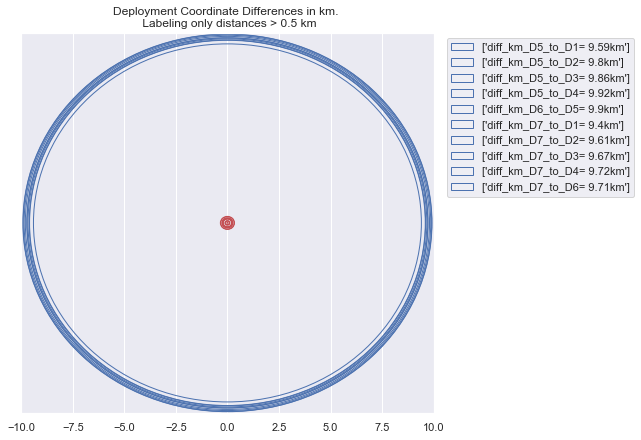

In [9]:
# Prepare figure handle
fig, ax = plt.subplots(figsize=(9, 6), constrained_layout=True) 
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
plt.title('Deployment Coordinate Differences in km. \n Labeling only distances > 0.5 km')

# initiate arrays to plot the figure legend
handles = []
labels = []

# loop through the distance dictionary and plot a circle at (0,0) with a radius = distance
for i in distance:
    # create text label
    label = [i+'= '+str(round(distance[i],2))+'km']

    # alternate colors by distance
    if distance[i] <= 0.5:
        circle1 = plt.Circle((0, 0), distance[i], color = 'r', fill=False)
        ax.add_artist(circle1)
    else:
        circle = plt.Circle((0, 0), distance[i], color = 'b', fill=False)
        ax.add_artist(circle)
        # save handles to print labels on the plot legend
        handles.append(circle)
        labels.append(label) 

ax.legend(handles, labels, bbox_to_anchor=(1.5, 1))
ax.get_yaxis().set_major_locator(ticker.NullLocator())

# save figure to a file
fig.savefig(save_to_dir + sensor_name + '_Coordinates_Difference_in_km.png', dpi = 300, bbox_inches='tight')

> **Observation:** The sensor is supposed to be deployed at every deployment near the same latitude and longitude location. The acceptable difference should be < .5 km. Deployment 5 and 7 coordinate locations are 9 km further than the rest of the deployments [1, 2, 3, 4, 6]. This observation raises questions which need to be investigated: (1) Are the entered values for lat/lon wrong? (2) Are the values correct and the data need to be annotated? 

<a id="4"></a>
### Deployment Depth.

In [10]:
# Parse deploy dataframe for 'deployment_depth' and 'water_depth' information.
depth_info = deploy[['deployment_number','deployment_depth','water_depth']]
depth_info

,deployment_number,deployment_depth,water_depth
0,1,30.0,4145
1,2,31.0,4145
2,3,47.0,4145
3,4,NaN,4146
4,5,NaN,4169
5,6,NaN,4145
6,7,NaN,4176


In [11]:
# Parse sensor_info dictionary for the expected (or planned) sensor water depth. 
z_end_depth = sensor_info['instrument']['end_depth']
z_start_depth = sensor_info['instrument']['start_depth']
print('Sensor expected deployment depth:  ', ('start at: ',z_end_depth, 'stops at:', z_start_depth))

Sensor expected deployment depth:   ('start at: ', 30, 'stops at:', 30)


> **Observation:** The start_at and stop_at depths are expected to be equal, since this is a non-mobile platform. It is stationary, deployed at 30 m in the water column.

<a id="41"></a>
#### Plot Deployment Depth Location.

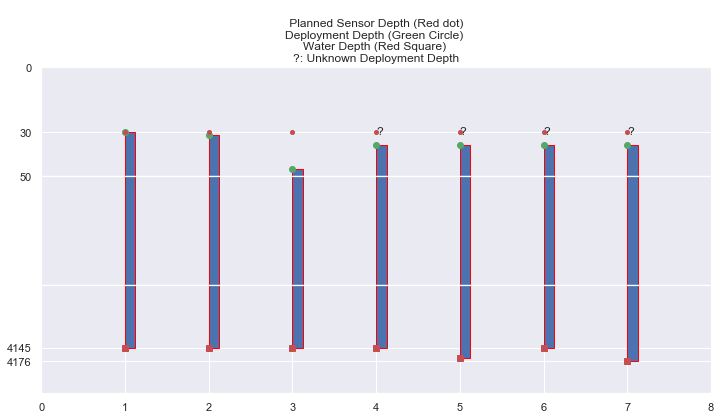

In [39]:
# Define figure parameters
n = 3 #number of subplots
listy = [50, 4000, 4250] # axis tick marks
visiblex = [False, False, True] # axis formatting

# figure handle
fig0 = plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel('Deployment Number')
plt.ylabel('Water Depth(m)')

# create figure axis
axis_list = []
for j in range(n):
    axis_list.append(plt.subplot(n,1,j+1))

# Loop through the figure axis
for j, ax in enumerate(axis_list):

    # Loop through the deployment table (depth_info)   
    for i in range(len(depth_info['water_depth'])):
        
        # define x and y to plot. x: deployment number, y: water depth
        x_start = int(depth_info['deployment_number'][i])
        y_end = int(depth_info['water_depth'][i])
        
        # replace unknown deployment depth with the average depth and mark with ?
        if np.isnan(depth_info['deployment_depth'][i]):
            y_start = np.nanmean(depth_info['deployment_depth'])
            texti = '?'
        else:
            y_start = int(depth_info['deployment_depth'][i])
            texti = ' '

        # Create a rectangle
        ax.add_patch(matplotlib.patches.Rectangle((x_start, y_start), 0.125, y_end-y_start, ec="red"))
        # Set axis parameters
        ax.set_xlim((0, 8))
        ax.get_yaxis().set_major_locator(ticker.FixedLocator(list(range(7))))
        ax.get_xaxis().set_visible(visiblex[j])
 
        # Plot markers for sensor deployment depths
        if j == 0:
            # plot a marker for deployment depth
            ax.plot(x_start,y_start, 'go-',linewidth=2)
            # plot a marker for planned sensor depth
            ax.plot(x_start, z_start_depth, '.r',markersize=8)
            # set axis 
            ax.set_ylim((listy[j],0))
            ax.get_yaxis().set_major_locator(ticker.FixedLocator([0,30,50]))
            # annotate plot
            ax.text(x_start,y_start-5, texti)
            ax.set(title='\n Planned Sensor Depth (Red dot) \n' \
                         'Deployment Depth (Green Circle) \n' \
                         'Water Depth (Red Square) \n' \
                         '?: Unknown Deployment Depth' )
        else:
            # set axis 
            ax.set_ylim((listy[j],listy[j-1]))
        
        # plot a marker for water depths
        if j == n-1:            
            ax.plot(x_start,y_end, 'rs',  label='Water Depth',linewidth=2 )
            # set axis
            ax.get_yaxis().set_major_locator(ticker.FixedLocator([4145,4176]))           

# save figure to a file
fig0.savefig(save_to_dir + sensor_name + '_DeploymentDepthComparison.png', dpi = 300)

> **Observation:** The planned sensor water depth is set to 30 m. However, we see that on deployment 3 the sensor was deployed 15 m deeper than planned. The rest of the deployments [4 - 7] have unknown deployment depths. This is a missing metadata information that needs to be verified. Later on, in this notebook, we will examine the pressure record in the file to get the measured sensor water depth as an approximation of where in the water column the sensor was deployed. However, the missing metadata information is needed for the quality check.

<a id="5"></a>
### Deployment Start and End Dates.

In [13]:
# Parse deploy for 'start_date' and 'stop_date' deployment information.
time_info = deploy[['deployment_number','start_date','stop_date']]
time_info

,deployment_number,start_date,stop_date
0,1,2013-07-24T06:32:00+00:00,2014-06-18T00:00:00+00:00
1,2,2014-06-20T02:00:00+00:00,2015-06-07T00:00:00+00:00
2,3,2015-06-08T21:25:00+00:00,2016-07-03T18:35:00+00:00
3,4,2016-07-04T23:07:00+00:00,2017-07-17T15:02:00+00:00
4,5,2017-07-14T22:49:00+00:00,2018-07-25T17:11:00+00:00
5,6,2018-07-24T23:01:00+00:00,2019-09-27T23:55:00+00:00
6,7,2019-09-27T21:26:00+00:00,None


In [14]:
# Merge lists of start and end dates for plotting purposes. 
dates=list(time_info['start_date'].values)+list(time_info['stop_date'].values)
# Do the same with their matching deployments.
names=list(time_info['deployment_number'].values)+list(time_info['deployment_number'].values)

#Replace None with current time
current_time = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
dates = [current_time if v is None else v for v in dates]

# get indices of a sorted 'dates' array 
ind  = sorted(range(len(dates)),key=dates.__getitem__)
# reshuffle the array in the order of the indices
date_list = [dates[i].split('+')[0] for i in ind ]
deployment_list = [names[i] for i in ind ]

# Convert date strings (e.g. 2014-10-182016-07-03T18:35:00) to datetime for plotting
date_list = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in date_list]
date_list, deployment_list

([datetime.datetime(2013, 7, 24, 6, 32),
  datetime.datetime(2014, 6, 18, 0, 0),
  datetime.datetime(2014, 6, 20, 2, 0),
  datetime.datetime(2015, 6, 7, 0, 0),
  datetime.datetime(2015, 6, 8, 21, 25),
  datetime.datetime(2016, 7, 3, 18, 35),
  datetime.datetime(2016, 7, 4, 23, 7),
  datetime.datetime(2017, 7, 14, 22, 49),
  datetime.datetime(2017, 7, 17, 15, 2),
  datetime.datetime(2018, 7, 24, 23, 1),
  datetime.datetime(2018, 7, 25, 17, 11),
  datetime.datetime(2019, 9, 27, 21, 26),
  datetime.datetime(2019, 9, 27, 23, 55),
  datetime.datetime(2020, 6, 27, 22, 21, 10)],
 [1, 1, 2, 2, 3, 3, 4, 5, 4, 6, 5, 7, 6, 7])

<a id="51"></a>
#### Plot Deployment Timeline.

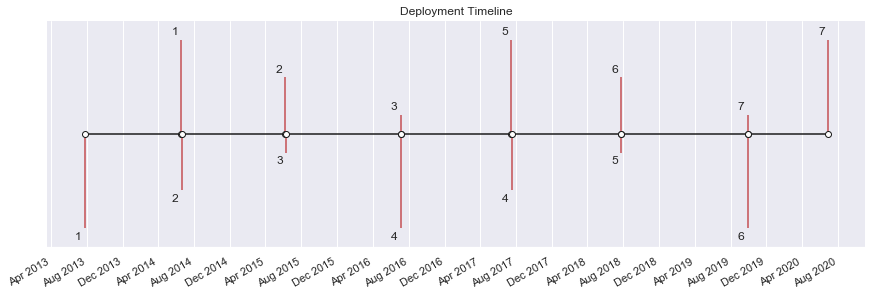

In [15]:
# Create figure and plot a stem plot with the date
fig1, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax.set(title="Deployment Timeline")

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(date_list)/6)))[:len(date_list)]

markerline, stemline, baseline = ax.stem(date_list, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(date_list)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(date_list, levels, deployment_list, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")
    
# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right") 

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)

# save figure to a file
fig1.savefig(save_to_dir + sensor_name + '_DeploymentTimeLine.png', dpi = 300)

> **Observation:** The timeline shows the start and end dates of the deployments. The numbers on the line are the deployment numbers. Note that not all deployments start after the end of the previous deployment. Sometimes a new sensor is deployed before the one in the water is recovered. So, there is an overlap in the data. See the colored text in the table below:



| #|      Start                    |    End                       |
|-|-                      |    -                       |
|3|	2016-07-04T23:07:00+00:00|	2017-07-<font color='red'>17</font>T15:02:00+00:00|
|---|---                      |    ---                       |
|4|	2017-07-<font color='red'>14</font>T22:49:00+00:00|	2018-07-<font color='blue'>25</font>T17:11:00+00:00|
|---|---                      |    ---                       |
|5|	2018-07-<font color='blue'>24</font>T23:01:00+00:00|	2019-09-27T<font color='green'>23</font>:55:00+00:00|
|---|---                      |    ---                       |
|6|	2019-09-27T<font color='green'>21</font>:26:00+00:00|	Not recovered - In water|




<a id="6"></a>
### Deployments’ Datasets

In [16]:
# change the path to where the .csv file with the list of datasets to be used exists on your machine.
%cd '/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/Module4_csvFiles/'
%ls

/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/Module4_csvFiles
data_qc_global_range_values.csv
data_review_list_GP03FLMB-RIM01-02-CTDMOG060_recovered.csv
data_review_list_GP03FLMB-RIM01-02-CTDMOG060_telemetered.csv


In [17]:
# Load files
list_recovered = pd.read_csv('data_review_list_GP03FLMB-RIM01-02-CTDMOG060_recovered.csv')
list_telemetered = pd.read_csv('data_review_list_GP03FLMB-RIM01-02-CTDMOG060_telemetered.csv')

In [18]:
# add the two lists together
url_list=list(list_recovered['files'].values)+list(list_telemetered['files'].values)
url_list

['deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc',
 'deployment0003_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20150608T213001-20160703T183001.nc',
 'deployment0004_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20160704T231501-20170717T150001.nc',
 'deployment0005_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20170714T230001-20180725T170001.nc',
 'deployment0006_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20180724T231501-20190927T234501.nc',
 'deployment0001_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20130724T100001-20140227T140001.nc',
 'deployment0002_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20140620T040001-20141109T000001.nc',
 'deployment0003_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20150609T000001-2

<a id="61"></a>
#### Plot Deployments' Datasets - Case of one parameter.
- The datasets from all deployments and all delivery methods are plotted.
- Outliers determined using a standard deviation equal to 5 are marked on the plot.
- The deployments start and end times are marked by vertical lines on the plot for clarity.
- The planned sensor water depths are marked by horizontal lines on the plot for clarity.

In [19]:
def reject_outliers(data, m=3):
    """
    Reject Outliers Using Standard Deviation.
    """
    stdev = np.nanstd(data)   
    ind = abs(data - np.nanmean(data)) < m * stdev
       
    return ind

In [20]:
# change directory to the location of the .nc files.
%cd '/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/module4_NetCDF_Files/'
%ls

/Users/leilabelabassi/Desktop/TAMU/online-class/612-DataQuality4theGeosciences/class_material/module4_NetCDF_Files
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20130724T100001-20140227T140001.nc
deployment0002_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20140620T040001-20141109T000001.nc
deployment0003_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20150608T213001-20160703T183001.nc
deployment0003_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20150609T000001-20160209T220001.nc
deployment0004_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20160704T231501-20170717T150001.nc
deployment0004_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20161008T080001-20161219T000001.nc
deployment0005_GP03FLMB-RI

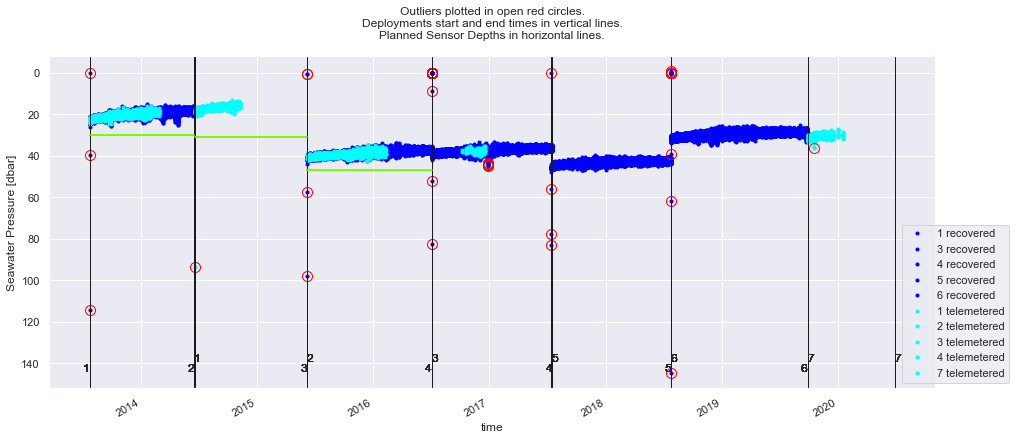

In [21]:
# Parameter to plot:
sci_parameter = 'ctdmo_seawater_pressure'

# Prepare plot
fig2, ax = plt.subplots(figsize=(14, 6), constrained_layout=True)

# loop through the file names list
for i in range(len(url_list)):
    d1 = xr.open_dataset(url_list[i])
    d1 = d1.swap_dims({'obs': 'time'})
    
    # prepare time array for plotting
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]

    # to use in the plot legend
    deploy_num = url_list[i].split('_')[0][-1] 
    delivery_method = url_list[i].split('_')[1].split('-')[4]
    label_text = deploy_num+ ' '+ delivery_method

    # alternate colors by delivery method
    if delivery_method == 'recovered':
        color_dots = 'blue'
    else:
        color_dots = 'cyan'
     
    # plot data
    d1[sci_parameter].plot(ax=ax,label=label_text,marker='.', \
                           color=color_dots, linestyle='None')
    
    # get the indices for outliers
    ind = reject_outliers(d1[sci_parameter].values, 5)
    # change ind from Boolean variable to integers
    res = [i for i, val in enumerate(ind) if val == False] 
    
    # use outliers indices to select the time and the science parameter
    date_list_false = [date_arr[i] for i in res]
    pressure_false = [d1[sci_parameter].values[i] for i in res] 
    
    # plot outliers
    ax.plot(date_list_false, pressure_false, linestyle='None', \
            color='red', marker='o',markersize=10, fillstyle='none')
    
    # delimit deployments using vertical lines
    for i in range(len(date_list)):
        ax.axvline(x=date_list[i], linewidth=0.5, color='k')
        if (i % 2) == 0:
            ax.annotate(deployment_list[i], xy=(date_list[i], 140),\
                        horizontalalignment='right', \
                        verticalalignment='top')
        else:
            ax.annotate(deployment_list[i], xy=(date_list[i], 140),\
                        horizontalalignment='left', \
                        verticalalignment='bottom')
    
    for i in range(len(depth_info)):        
        if ~np.isnan(depth_info['deployment_depth'][i]):
            
            time_s = datetime.strptime(time_info['start_date'][i].split('+')[0], \
                                       "%Y-%m-%dT%H:%M:%S")
            time_n = datetime.strptime(time_info['stop_date'][i].split('+')[0], \
                                       "%Y-%m-%dT%H:%M:%S")
            ax.plot([time_s,time_n],\
                    [depth_info['deployment_depth'][i],depth_info['deployment_depth'][i]]\
                    , color= 'lawngreen')
            
# add legend and title
ax.legend(loc='lower right', bbox_to_anchor=(1.09, 0))
ax.set(title= 'Outliers plotted in open red circles.\n' \
              'Deployments start and end times in vertical lines.\n' \
              'Planned Sensor Depths in horizontal lines.\n' \
      )
plt.gca().invert_yaxis()

# save figure to a file
fig2.savefig(save_to_dir + sensor_name + '_'+ sci_parameter +\
             '_Outliers.png', dpi = 300, bbox_inches='tight')

> **Observation:** 
- Each deployment is supposed to have two delivery data methods, recovered and telemetered. However, there are missing recovered and telemetered data:
    - Deployment 2 recovered data are missing
    - Deployments 5 and 6 telemetered data are missing. 
    - Deployment 7 recovered data are not missing. The sensor has not been recovered yet.
- When comparing the deployment start and end dates to the data files' timestamps, you can visually spot where data are missing on the timeline:
    - Deployments 1, 2, and 3 telemetered data are missing at the end of the deployments.
    - Deployment 4 telemetered data are missing at the beginning and the end of the deployment.
- Comparing the pressure record to the sensor deployment depth (horizontal lines), there exist a difference between the values measured and planned:
    - deployments 1 and 2 are deployed shallower than the sensor depth entered in the metadata deployment file.
    - deployment 3 is deployed shallower than the metadata sensor depth but deeper than the planned depth of (30 m).
    - the rest of the deployments cannot be compared because of the missing metadata.
- Outliers in the pressure record are suspect and occur at the beginning and the end of the deployments. The rest of the data are reasonable. Suspect data need to be flagged in the datasets. 


> **Data Quality Review Best Practice:** DO NOT DELETE DATA, USE FLAGS.

<a id="62"></a>
#### Plot Deployment Datasets - Case of multiple parameters.

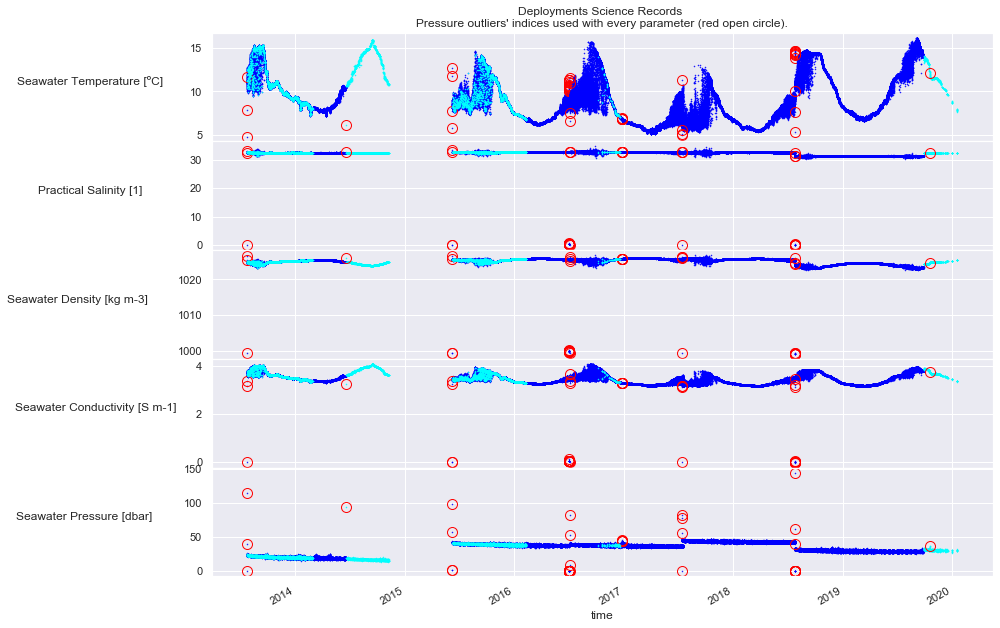

In [26]:
# parameters to plot
params = ['ctdmo_seawater_temperature', 'practical_salinity', 'density', 'ctdmo_seawater_conductivity', 'ctdmo_seawater_pressure']

# prepare figure
fig3 = plt.figure(figsize=(14, 10))
plt.subplots_adjust(wspace=0, hspace=0)

# prepare axis
axis_list = []
for j in range(len(params)):
    axis_list.append(plt.subplot(len(params),1,j+1))

# loop through the .csv file to read the datafiles
for dataset in url_list: 
    d1 = xr.open_dataset(dataset)
    d1 = d1.swap_dims({'obs': 'time'})
    
    # prepare time array for plotting
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]
    
    # get delivery method 
    delivery_method = dataset.split('_')[1].split('-')[4]

    # alternate colors with delivery method
    if delivery_method == 'recovered':
        color_dots = 'blue'
    else:
        color_dots = 'cyan'
        
    # get indices of the pressure outliers.
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)   
    res = [i for i, val in enumerate(ind) if val == False] 
    
    # select data outliers
    date_list_false = [date_arr[i] for i in res]
    
    # prepare time for ploting the x-axis
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]

    # plot datasets
    for j, ax in enumerate(axis_list):
        d1[params[j]].plot(ax=ax,linestyle='None',marker='.',markersize=1, color=color_dots)
        param_false = [d1[params[j]].values[i] for i in res]
        ax.plot(date_list_false, param_false, linestyle='None',color='red', marker='o',markersize=10, fillstyle='none')
        ax.set_ylabel(ax.get_ylabel(), rotation='horizontal', labelpad=100, wrap=False)
   
    
axis_list[0].set(title='Deployments Science Records \n' \
                        'Pressure outliers\' indices used with every parameter (red open circle).')


# save figure to a file
fig3.savefig(save_to_dir + sensor_name + '_ScienceRecords_Outliers.png', dpi = 300, bbox_inches='tight')

> **Observation:** 
- By selecting the timestamps of the pressure outliers, you can show which data correspond to the same timestamps in any other parameter. 
- This is very helpful when you have dependencies in the data, which means a parameter calculated using one or more other parameters. If one is bad or suspect all the other dependencies should be marked as bad or suspect as well. 
- In this example, the pressure parameter flags can be applied to all other parameters. It is clear that the suspect data are occurring at the beginning and the end of deployments (i.e., when the instrument is going down or up in the water). 
- So, in relation to instrument deployment and recovery time, the pressure is a good proxy for flagging the suspect data in all other parameters. 
- Also, notice that the presence of outliers makes it very hard to see the patterns in the data when plotted. The data need to be rejected when plotting to get a better display of your data (see next).

<a id="63" ></a>
### Plot Science Variables Without Outliers.

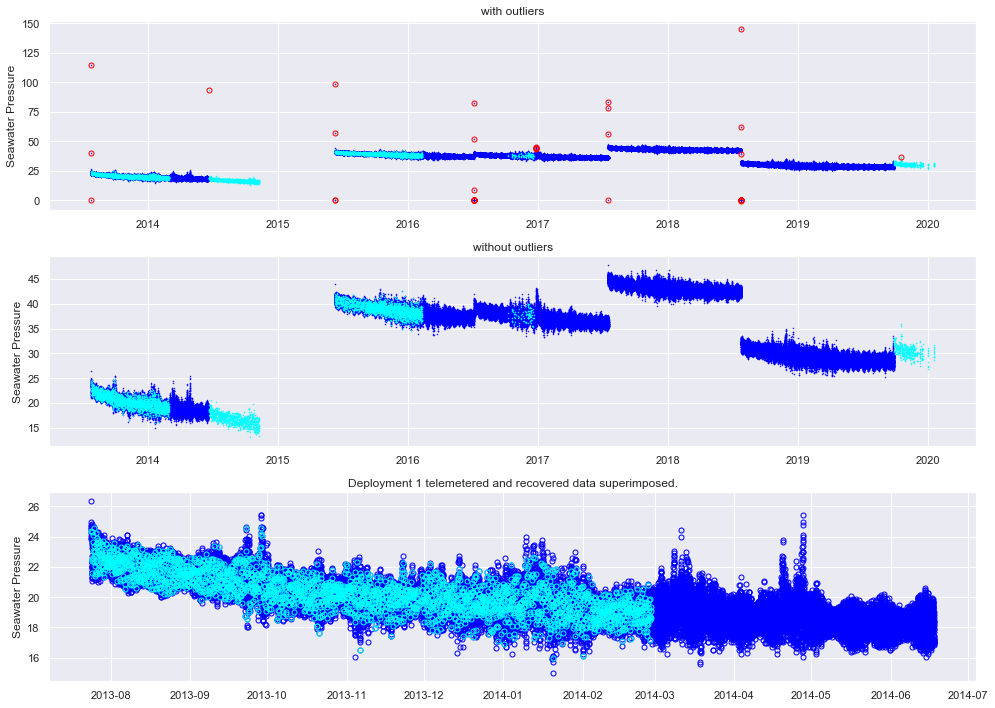

In [31]:
fig4,(ax1, ax2, ax3) = plt.subplots(3,1, figsize=(14,10))
for i in range(len(url_list)):
    d1 = xr.open_dataset(url_list[i])
    d1 = d1.swap_dims({'obs': 'time'})
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]
    deploy_num = url_list[i].split('_')[0][-1]
    delivery_method = url_list[i].split('_')[1].split('-')[4]

    # alternate colors 
    if delivery_method == 'recovered':
        color_dots = 'blue'
    else:
        color_dots = 'cyan'
        
    #Get indices to flag the pressure outliers.
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)   
    res_t = [i for i, val in enumerate(ind) if val == True] 
    res_f = [i for i, val in enumerate(ind) if val == False]
    
    date_list_good = [date_arr[i] for i in res_t]   
    temp_good = [d1['ctdmo_seawater_pressure'].values[i] for i in res_t]
    
    date_list_bad = [date_arr[i] for i in res_f]   
    temp_bad = [d1['ctdmo_seawater_pressure'].values[i] for i in res_f]

    # plot data
    ax1.plot(date_arr,d1['ctdmo_seawater_pressure'], linestyle='None', marker='.', markersize=1, color=color_dots)
    ax1.plot(date_list_bad, temp_bad, linestyle='None', marker='o', markersize=5, color='red', fillstyle='none')
    ax1.set(title="with outliers")
    ax1.set_ylabel(d1['ctdmo_seawater_pressure'].long_name, rotation='vertical')
    ax1.get_xaxis().set_visible(True)
    # plot outliers
    ax2.plot(date_list_good, temp_good, linestyle='None', marker='.', markersize=1, color=color_dots) 
    ax2.set(title="without outliers")
    ax2.set_ylabel(d1['ctdmo_seawater_pressure'].long_name, rotation='vertical')    
    ax2.get_xaxis().set_visible(True)               
    
    if int(deploy_num) == 1:       
        ax3.plot(date_list_good, temp_good, color=color_dots, linestyle='None', marker='o', markersize=5, fillstyle='none') 
        ax3.set_ylabel(d1['ctdmo_seawater_pressure'].long_name, rotation='vertical')
        ax3.set(title="Deployment 1 telemetered and recovered data superimposed.")
        ax1.get_xaxis().set_visible(True)
        
plt.tight_layout()

# save figure to a file
fig4.savefig(save_to_dir + sensor_name + '_ScienceRecords_Clean.png', dpi = 300, bbox_inches='tight')

> **Observation:**  
- Removing the outliers help a better representation of the data. For example, the pressure record shows the range of depth at which data are being collected. This is the vertical coordinates of all the science parameters. 
- Comparison between telemetered and recovered data for the 1st deployment show some differences in values for the same timestamps. In a previous Lab, we have shown how to compare data to calculate the difference and tabulate the numbers. The differences between telemetered and recovered data are data quality issues that need to be addressed to discover if it is a system problem (algorithms not working properly) or a sensor problem (malfunction or setting problems). 

<a id="7" ></a>
### Report Flags.
- To report suspect or bad data, the rule in data quality control is to never delete a data point. You should always use flags. 
- In this example, we are using boolean variables to attach to a timestamp. For example, any pressure data outside the 5 standad deviation envolope are flagged as Flase. 
- You can use an integers to refer to flags. Commonly used are: 0: good data, 1: suspect data, 2: bad data, 3: for review. 
- This practice is used to inform other users that an algorithm or a human-in-the loop has looked at the data and this is the first data assessment. 
- The users have both the original data **because it has not been deleted** and they also have the resulst of a data quality review that they can start with. It is up to a more advance analysis of the data to agree or disagree with the review flags. What is important is that all the data is there.  


In [32]:
# reject outliers
flag_df = pd.DataFrame()
index_list=[]
for i in range(len(url_list)): #len(list_telemetered)
    file_name = url_list[i]
    d1 = xr.open_dataset(file_name)
    d1 = d1.swap_dims({'obs': 'time'})
    
    date_arr = [str(d)[:-4] for d in d1['time'].values]
    date_arr = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in date_arr]
    
    ind = reject_outliers(d1['ctdmo_seawater_pressure'].values, 5)

    index_list = [file_name for n in range(len(date_arr))] 
    
    df0 = pd.DataFrame({'Date': date_arr, 'Pressure_Flag': ind}, index=index_list)
    flag_df = flag_df.append(df0)
    
flag_df

,Date,Pressure_Flag
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 06:45:01,False
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:00:01,False
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:15:01,False
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:30:01,True
deployment0001_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20130724T064501-20140617T234501.nc,2013-07-24 07:45:01,True
...,...,...
deployment0007_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 04:00:01,True
deployment0007_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 08:00:01,True
deployment0007_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 12:00:01,True
deployment0007_GP03FLMB-RIM01-02-CTDMOG060-telemetered-ctdmo_ghqr_sio_mule_instrument_20190928T000001-20200118T200001.nc,2020-01-18 16:00:01,True


<a id="8"></a>
### Data Annotations.

In [33]:
# parse the sensor_info dictionary for 'annotations' information.
annotation = pd.DataFrame(sensor_info['instrument']['annotations'])
annotation.keys()

Index(['id', 'reference_designator', 'method', 'stream', 'parameter',
       'start_datetime', 'end_datetime', 'annotation', 'exclusionFlag',
       'qcFlag', 'source'],
      dtype='object')

In [34]:
annotation[['id','start_datetime', 'end_datetime', 'annotation']]

,id,start_datetime,end_datetime,annotation
0,154,2013-07-24T02:32:00+00:00,2014-06-17T20:00:00+00:00,Deployment 1: Mooring was deployed 5-10m shall...
1,584,2014-06-19T22:00:00+00:00,2015-06-06T20:00:00+00:00,Deployment 2: Recovered data are not available...
2,155,2014-06-19T22:00:00+00:00,2015-06-06T20:00:00+00:00,Deployment 2: Mooring was deployed 10-15m shal...
3,156,2015-06-08T17:25:00+00:00,2016-07-03T14:35:00+00:00,Deployment 3: Mooring was deployed 10m deeper ...
4,157,2016-07-04T19:07:00+00:00,2017-07-17T11:02:00+00:00,Deployment 4: Mooring was deployed 10m deeper ...
5,2165,2017-07-14T18:49:00+00:00,2018-07-25T13:11:00+00:00,Deployment 5: It was discovered upon recovery ...
6,142,2017-07-14T18:49:00+00:00,2018-07-25T13:11:00+00:00,Deployment 5: Telemetered data are not availab...


<a id="9"></a>
### Data Notes.

In [35]:
# parse the sensor_info dictionary for 'notes' information.
note = pd.DataFrame(sensor_info['instrument']['notes'])
note.keys()

Index(['id', 'user_id', 'type', 'comment', 'model', 'reference_designator',
       'deployment', 'asset_uid', 'start_date', 'end_date', 'status',
       'redmine_issue', 'resolved_date', 'image_url', 'created', 'modified',
       'user'],
      dtype='object')

In [36]:
note[['id','type','model', 'start_date', 'end_date', 'comment']]

,id,type,model,start_date,end_date,comment
0,506,comment,sites,2016-07-04T23:07:00+00:00,2018-07-25T17:11:00+00:00,Deployments 4 and 5 don't have deployment dept...
1,532,annotation,instruments,2014-06-20T02:00:00+00:00,2015-06-07T00:00:00+00:00,Annotation ID 584 should provide more informat...
2,543,comment,sites,None,None,Annotation ID 1531: recovered_host data are no...
3,517,comment,sites,2017-07-14T22:49:00+00:00,2018-07-25T17:11:00+00:00,The mooring was deployed 9 - 10 km from the lo...


<a id="10"></a>
### Data Report Files.

In [37]:
flag_df.to_csv(save_to_dir+'/'+sensor_name+'_PressureFlags.csv')
annotation.to_csv(save_to_dir+'/'+sensor_name+'_Annotations.csv')
note.to_csv(save_to_dir+'/'+sensor_name+'_Notes.csv')

<span style='color:blue'> **The created reports are needed for the assignment notebook.** </span>


### END